<a href="https://colab.research.google.com/github/IamSamage/GW-Signal-Analysis/blob/main/L1vsH1(Normalized%2C%20Aligned).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 44.0.2 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.2 which is incompatible.


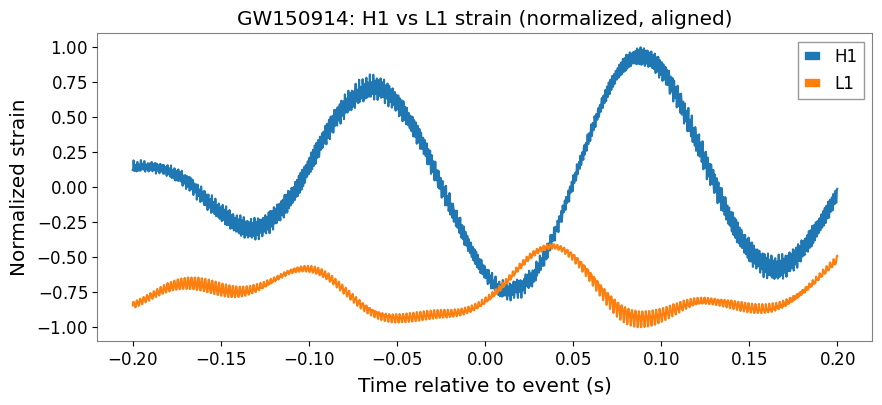


🕒 최대 상관 시점 (time lag): 0.052246 seconds


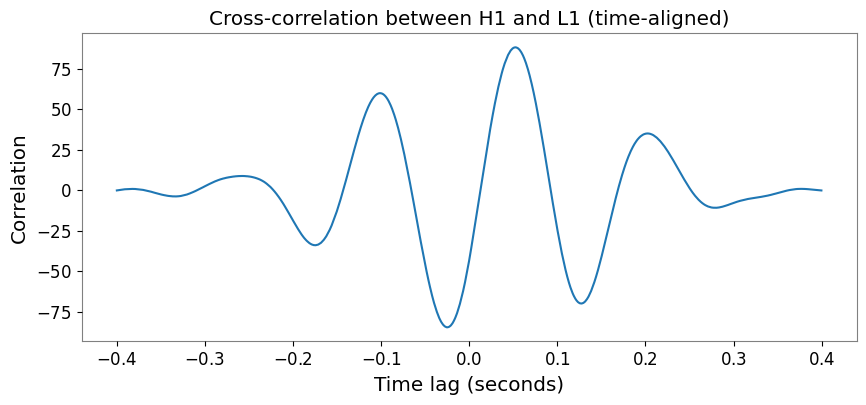

In [ ]:
!pip install gwpy --quiet

from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate

event_time = 1126259462.4
start = event_time - 1
end = event_time + 1

strain_h1 = TimeSeries.fetch_open_data('H1', start, end, sample_rate=4096)
strain_l1 = TimeSeries.fetch_open_data('L1', start, end, sample_rate=4096)

h1_seg = strain_h1.crop(event_time - 0.2, event_time + 0.2)
l1_seg = strain_l1.crop(event_time - 0.2, event_time + 0.2)

h1_seg = TimeSeries(h1_seg.value, sample_rate=h1_seg.sample_rate, t0=event_time)
l1_seg = TimeSeries(l1_seg.value, sample_rate=l1_seg.sample_rate, t0=event_time)

h1_seg = h1_seg / np.max(np.abs(h1_seg.value))
l1_seg = l1_seg / np.max(np.abs(l1_seg.value))

t = np.linspace(-0.2, 0.2, len(h1_seg.value))
plt.figure(figsize=(10, 4))
plt.plot(t, h1_seg.value, label='H1')
plt.plot(t, l1_seg.value, label='L1')
plt.legend()
plt.title("GW150914: H1 vs L1 strain (normalized, aligned)")
plt.xlabel("Time relative to event (s)")
plt.ylabel("Normalized strain")
plt.grid()
plt.show()

l1_val = l1_seg.value - np.mean(l1_seg.value)
h1_val = h1_seg.value - np.mean(h1_seg.value)

corr = correlate(h1_val, l1_val, mode='full')
lags = np.arange(-len(h1_val)+1, len(h1_val))
dt = l1_seg.dt.value
lag_seconds = lags * dt

max_idx = np.argmax(corr)
time_delay = lag_seconds[max_idx]

print(f"\n🕒 최대 상관 시점 (time lag): {time_delay:.6f} seconds")

plt.figure(figsize=(10, 4))
plt.plot(lag_seconds, corr)
plt.title("Cross-correlation between H1 and L1 (time-aligned)")
plt.xlabel("Time lag (seconds)")
plt.ylabel("Correlation")
plt.grid()
plt.show()
